<a href="https://colab.research.google.com/github/WajdiB41/demo-repo/blob/feature-readme-instruction/Own_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [2]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
# import train_df which contain train set

from google.colab import files
uploaded = files.upload()

import io
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving train.csv to train.csv


In [4]:
# import train_df which contain train set

from google.colab import files
uploaded = files.upload()

import io
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving test.csv to test.csv


In [5]:
# display the first 5 row of df_train dataset
train_df.head()

,x,y
0,24.0,21.5
1,50.0,47.5
2,15.0,17.2
3,38.0,36.6
4,87.0,87.3


In [6]:
train_df.describe()

,x,y
count,700.0,699.0
mean,55.0,49.9
std,134.7,29.1
min,0.0,-3.8
25%,25.0,24.9
50%,49.0,49.0
75%,75.0,74.9
max,3530.2,108.9


In [7]:
train_df['y'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Name: y, Length: 700, dtype: bool

In [8]:
train_df['y']

0     21.5
1     47.5
2     17.2
3     36.6
4     87.3
      ... 
695   58.6
696   94.6
697   88.6
698   63.6
699   95.0
Name: y, Length: 700, dtype: float64

In [9]:
train_df['x'].loc[8]

25.0

In [10]:
for i in range(len(train_df)):
  if train_df['x'].iloc[i] == train_df['x'].max():
    print(i)
  
    

213


In [11]:
train_df = train_df.drop(labels=[213], axis=0)

In [12]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [13]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
6/6 [==============================] - 0s 20ms/step - loss: 7188.3774 - root_mean_squared_error: 84.7843 - val_loss: 6597.4004 - val_root_mean_squared_error: 81.2244
Epoch 2/30
6/6 [==============================] - 0s 4ms/step - loss: 5501.0000 - root_mean_squared_error: 74.1687 - val_loss: 5293.4160 - val_root_mean_squared_error: 72.7559
Epoch 3/30
6/6 [==============================] - 0s 4ms/step - loss: 4429.8223 - root_mean_squared_error: 66.5569 - val_loss: 4272.5962 - val_root_mean_squared_error: 65.3651
Epoch 4/30
6/6 [==============================] - 0s 4ms/step - loss: 3571.7495 - root_mean_squared_error: 59.7641 - val_loss: 3433.9531 - val_root_mean_squared_error: 58.5999
Epoch 5/30
6/6 [==============================] - 0s 4ms/step - loss: 2857.9646 - root_mean_squared_error: 53.4599 - val_loss: 2725.4221 - val_root_mean_squared_error: 52.2056
Epoch 6/30
6/6 [==============================] - 0s 4ms/step - loss: 2250.9001 - root_mean_squared_error: 47.4437 - va

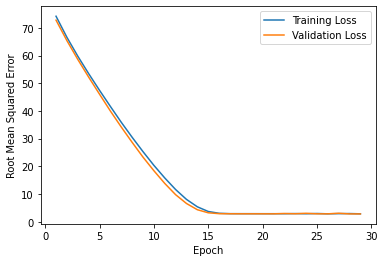

In [27]:
# The following variables are the hyperparameters.
learning_rate = 0.02
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Identify the feature and the label.
my_feature="x"  # the median income on a specific city block.
my_label="y" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [28]:
# Use the test dataset to evaluate the model
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)
print(results)


3/3 [==============================] - 0s 3ms/step - loss: 9.7551 - root_mean_squared_error: 3.1233
[9.755051612854004, 3.123307943344116]
